In [1]:
%matplotlib inline
from astropy.io import fits
import numpy as np
import copy
import matplotlib.pyplot as plt
import constants as pc

In [2]:
# import a code file hydro3.py
import hydro3

# define a dictionary with some arguments that we will pass to the hydrodynamics code
# the "hnames" and "htype" arguments mean we are using a solution for a massive star from Heger & Woosley
# it has "zero" metallicity, meaning it will be a blue supergiant star

# noplot means we aren't going to draw plots as the code runs, which makes it faster
args = {'hname':'z40.0','htype':'zero','noplot':1,'t_stop':2.5e2}

# define the variable h which is a "lagrange_hydro_1d" object (instance of a class)
h = hydro3.lagrange_hydro_1d(**args)

# this tells the hydro code that we are using a Heger & Woosley star (e.g., so that it knows how to read the file)
h.itype=h.HEGER

In [3]:
# variables stored within our object h are accessed by h.variable_name
# use your past labs and class notebooks, the hydro code notes, and class slides for help!
h.bctype=[h.INFLOW, h.OUTFLOW]
h.setup_initial_conditions()
h.initialize_boundary_conditions()

gzip: heger_progenitors/zero/z40.0 already exists;	not overwritten


header:  ['grid', 'cell', 'outer', 'total', 'mass', 'cell', 'outer', 'radius', 'cell', 'outer', 'velocity', 'cell', 'density', 'cell', 'temperature', 'cell', 'pressure', 'cell', 'specific', 'energy', 'cell', 'specific', 'entropy', 'cell', 'angular', 'velocity', 'cell', 'A_bar', 'cell', 'Y_e', 'stability', 'NETWORK', 'neutrons', 'H1', 'He3', 'He4', 'C12', 'N14', 'O16', 'Ne20', 'Mg24', 'Si28', 'S32', 'Ar36', 'Ca40', 'Ti44', 'Cr48', 'Fe52', 'Fe54', 'Ni56', 'Fe56', "'Fe'"]
r inner:  289493848.9016604


gzip: heger_progenitors/zero/z40.0.gz already exists;	not overwritten


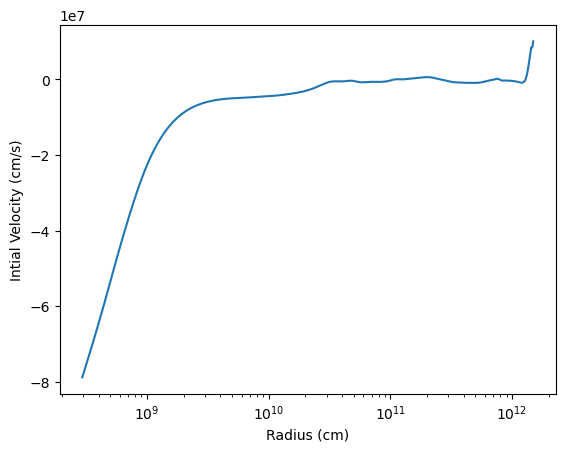

In [4]:
plt.semilogx(h.zones.r, h.zones.v)
plt.xlabel('Radius (cm)')
plt.ylabel('Intial Velocity (cm/s)');

In [5]:
U = 1e51          # create a variable for the initial energy
V = ((4/3) * np.pi * (h.zones.r[5])**3)      # calculate total volume 
u = U/V        # calculate internal energy density

rho = h.zones.d[5]       # calculate density of the first five zones
e = u / rho        # calculate energy per unit mass

h.zones.e[:5] = e   # distribute the initial energy per unit mass to the first 5 zones

In [6]:
h.run()

     0 0.000e+00 6.685e-04
4.289e+33 4.000e+01 5.228e+48 1.055e+52 -1.148e+52 -9.251e+50
   100 5.714e-02 5.609e-04
4.289e+33 4.000e+01 5.583e+48 1.057e+52 -1.150e+52 -9.228e+50
   200 1.088e-01 5.159e-04
4.289e+33 4.000e+01 6.907e+48 1.059e+52 -1.150e+52 -9.065e+50
   300 1.608e-01 5.212e-04
4.289e+33 4.000e+01 8.287e+48 1.061e+52 -1.151e+52 -8.908e+50


/home/phdo8065/astr3400/Final Project/hydro3.py:502: RuntimeWarning: divide by zero encountered in divide
  new_d = self.zones.mass/self.zones.vol
/home/phdo8065/astr3400/Final Project/hydro3.py:527: RuntimeWarning: invalid value encountered in multiply
  self.zones.p = (self.gamma - 1)*new_e*new_d


   400 2.130e-01 5.240e-04
4.289e+33 4.000e+01 9.711e+48 1.062e+52 -1.150e+52 -8.747e+50
   500 2.656e-01 5.270e-04
4.289e+33 4.000e+01 1.115e+49 1.063e+52 -1.150e+52 -8.581e+50
   600 3.184e-01 5.299e-04
4.289e+33 4.000e+01 1.262e+49 1.064e+52 -1.149e+52 -8.412e+50
   700 3.716e-01 5.333e-04
4.289e+33 4.000e+01 1.430e+49 1.064e+52 -1.148e+52 -8.238e+50
   800 4.251e-01 5.365e-04
4.289e+33 4.000e+01 1.613e+49 1.065e+52 -1.147e+52 -8.059e+50
   900 4.789e-01 5.401e-04
4.289e+33 4.000e+01 1.815e+49 1.065e+52 -1.145e+52 -7.875e+50
  1000 5.331e-01 5.439e-04
4.289e+33 4.000e+01 2.039e+49 1.064e+52 -1.143e+52 -7.686e+50
  1100 5.878e-01 5.503e-04
4.289e+33 4.000e+01 2.287e+49 1.064e+52 -1.141e+52 -7.490e+50
  1200 6.430e-01 5.529e-04
4.289e+33 4.000e+01 2.559e+49 1.064e+52 -1.139e+52 -7.281e+50
  1300 6.984e-01 5.561e-04
4.289e+33 4.000e+01 2.855e+49 1.063e+52 -1.137e+52 -7.065e+50
  1400 7.542e-01 5.608e-04
4.289e+33 4.000e+01 3.177e+49 1.063e+52 -1.134e+52 -6.844e+50
  1500 8.105e-01 5.65

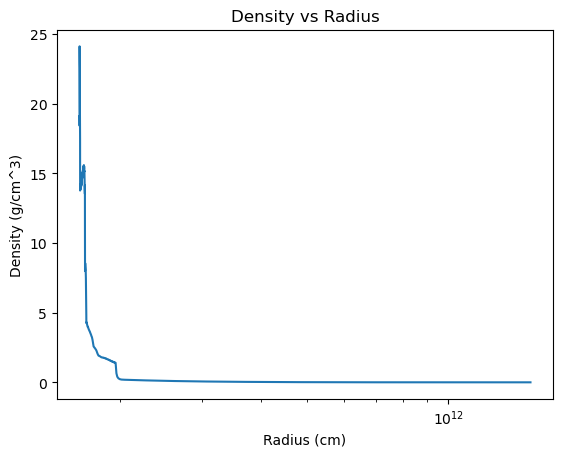

In [7]:
plt.semilogx(h.zones.r, h.zones.d)
plt.title('Density vs Radius')
plt.xlabel('Radius (cm)')
plt.ylabel('Density (g/cm^3)');

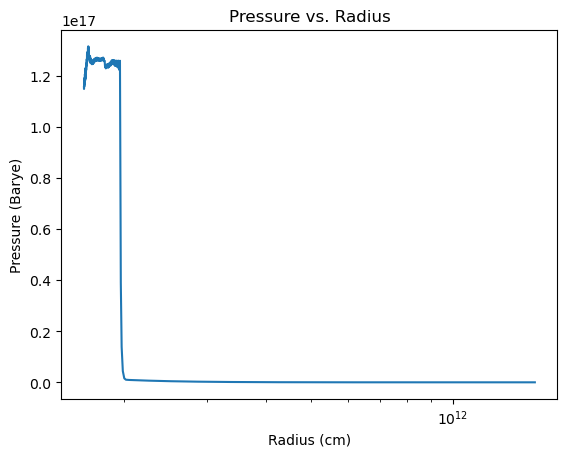

In [8]:
plt.semilogx(h.zones.r, h.zones.p)
plt.title('Pressure vs. Radius')
plt.xlabel('Radius (cm)')
plt.ylabel('Pressure (Barye)');

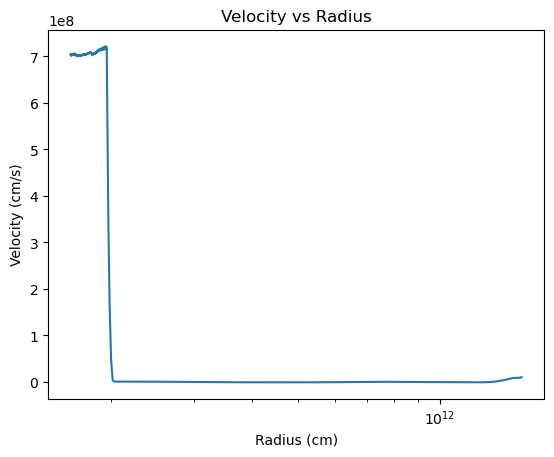

In [9]:
plt.semilogx(h.zones.r, h.zones.v)
plt.title('Velocity vs Radius')
plt.xlabel('Radius (cm)')
plt.ylabel('Velocity (cm/s)');

In [10]:
h.t_stop=h.t*2.
h.run()

342200 2.500e+02 7.009e-04
4.289e+33 4.000e+01 1.250e+52 5.170e+51 -8.703e+50 1.680e+52
342300 2.501e+02 7.009e-04
4.289e+33 4.000e+01 1.250e+52 5.170e+51 -8.701e+50 1.680e+52
342400 2.502e+02 7.009e-04
4.289e+33 4.000e+01 1.250e+52 5.171e+51 -8.700e+50 1.680e+52
342500 2.502e+02 7.009e-04
4.289e+33 4.000e+01 1.250e+52 5.172e+51 -8.698e+50 1.681e+52
342600 2.503e+02 7.009e-04
4.289e+33 4.000e+01 1.251e+52 5.172e+51 -8.697e+50 1.681e+52
342700 2.504e+02 7.009e-04
4.289e+33 4.000e+01 1.251e+52 5.173e+51 -8.695e+50 1.681e+52
342800 2.504e+02 7.009e-04
4.289e+33 4.000e+01 1.251e+52 5.173e+51 -8.693e+50 1.681e+52
342900 2.505e+02 7.010e-04
4.289e+33 4.000e+01 1.251e+52 5.174e+51 -8.692e+50 1.681e+52
343000 2.506e+02 7.011e-04
4.289e+33 4.000e+01 1.251e+52 5.174e+51 -8.690e+50 1.682e+52
343100 2.507e+02 7.012e-04
4.289e+33 4.000e+01 1.251e+52 5.175e+51 -8.689e+50 1.682e+52
343200 2.507e+02 7.014e-04
4.289e+33 4.000e+01 1.251e+52 5.175e+51 -8.687e+50 1.682e+52
343300 2.508e+02 7.017e-04
4.289

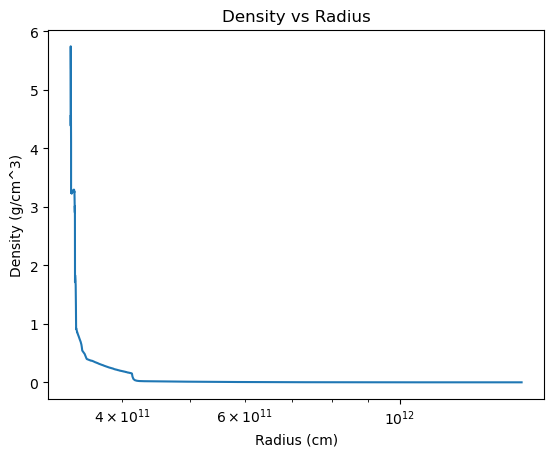

In [11]:
plt.semilogx(h.zones.r, h.zones.d)
plt.title('Density vs Radius')
plt.xlabel('Radius (cm)')
plt.ylabel('Density (g/cm^3)');

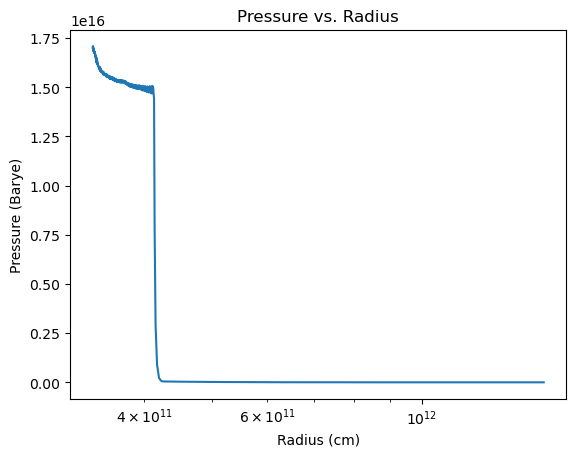

In [12]:
plt.semilogx(h.zones.r, h.zones.p)
plt.title('Pressure vs. Radius')
plt.xlabel('Radius (cm)')
plt.ylabel('Pressure (Barye)');

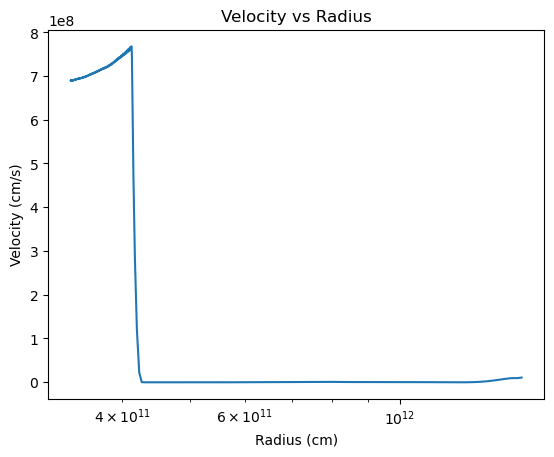

In [13]:
plt.semilogx(h.zones.r, h.zones.v)
plt.title('Velocity vs Radius')
plt.xlabel('Radius (cm)')
plt.ylabel('Velocity (cm/s)');